# Explore fault data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py 
import cv2
import os
import segyio

# Visualize 3d origin labeled data

In [2]:
root_path = '/home/zhangzr/FaultRecongnition/Fault_data/public_data/precessed'
ori_seis = np.load(os.path.join(root_path, 'seisval.npy'))
ori_label = np.load(os.path.join(root_path, 'faultval.npy'))

In [ ]:
print(np.mean(ori_seis))
print(np.std(ori_seis))

In [3]:
print(np.sum(ori_label) / (ori_label.shape[0] * ori_label.shape[1] * ori_label.shape[2]))

0.01757940758906847


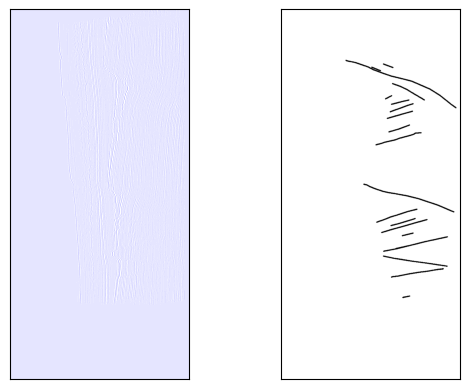

In [4]:
slice_id = 10
plt.subplot(1,2,1)
fig = plt.imshow(ori_seis[slice_id,:,:], cmap='seismic')
fig.axes.xaxis.set_visible(False)
fig.axes.yaxis.set_visible(False)
plt.subplot(1,2,2)
fig = plt.imshow(ori_label[slice_id,:,:], cmap='binary')
fig.axes.xaxis.set_visible(False)
fig.axes.yaxis.set_visible(False)
plt.show()

In [2]:
root_path = "/home/zhangzr/FaultRecongnition/Fault_data/real_labeled_data"
ori_seis = segyio.tools.cube(os.path.join(root_path, 'origin_data', 'seis' , 'mig_fill.sgy'))
ori_label = segyio.tools.cube(os.path.join(root_path, 'origin_data', 'fault', 'label_fill.sgy'))

In [3]:
print(np.sum(ori_label) / (ori_label.shape[0] * ori_label.shape[1] * ori_label.shape[2]))

0.032228465339636525


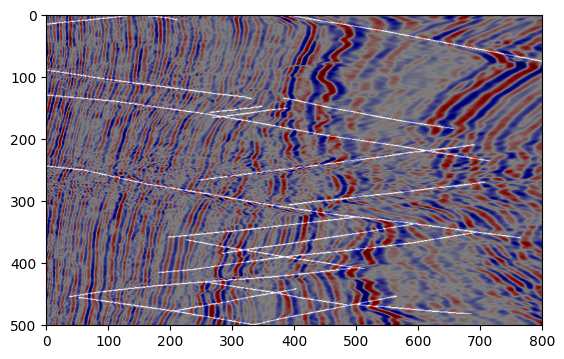

In [9]:
slice_id = 500
plt.imshow(ori_seis[slice_id,:,:], cmap='seismic')
plt.imshow(ori_label[slice_id,:,:], cmap='gray', alpha=0.5)
plt.show()

# Visualize 3d real labeled crop data

In [6]:
root_path = '/home/zhangzr/FaultRecongnition/Fault_data/real_labeled_data'
scr_root_path = os.path.join(root_path, 'crop')
data_split = 'train'
data_lst = os.listdir(os.path.join(scr_root_path, data_split))
index = 15
with h5py.File(os.path.join(scr_root_path, data_split, data_lst[index]), 'r') as f:
    seis = f['raw'][:]
    label = f['label'][:]
print(seis.mean())
print(seis.std())

143.33585
5546.2373


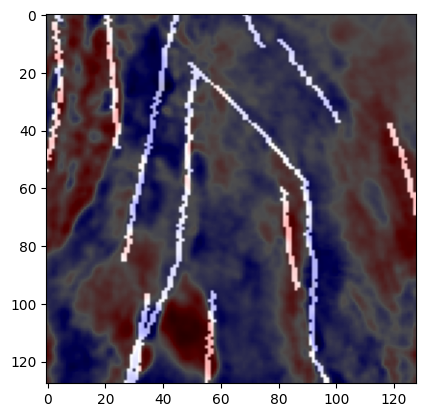

In [7]:
slice_id = 0
plt.imshow(seis[:,:,slice_id], cmap='seismic')
plt.imshow(label[:,:,slice_id], cmap='gray', alpha=0.7)
plt.show()

# Visualize simulate data

In [17]:
root_dir = '/home/zhangzr/FaultRecongnition/Fault_data/simulate_data'
name = '50.dat'
split = 'train'
seis = np.fromfile(os.path.join(root_dir, split, 'seis', name), dtype=np.single)
label = np.fromfile(os.path.join(root_dir, split, 'fault', name), dtype=np.single)
# reshape into 128 * 128 * 128
seis = seis.reshape((128, 128, 128))
label = label.reshape((128, 128, 128))

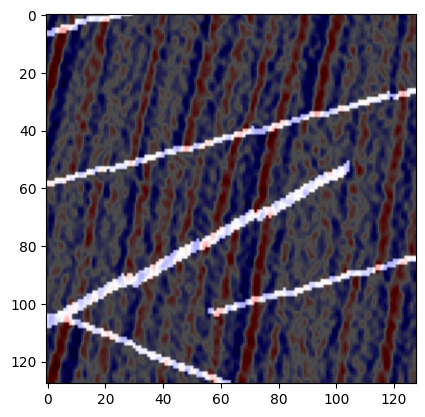

In [18]:
slice_id = 15
plt.imshow(seis[:,slice_id,:], cmap='seismic')
plt.imshow(label[:,slice_id,:], cmap='gray', alpha=0.7)
plt.show()

# Visulize 2D Crop Data

In [5]:
root_dir = '/home/zhangzr/FaultRecongnition/Fault_data/real_labeled_data/2d_slices'
split = 'val'
data_lst = os.listdir(os.path.join(root_dir, split, 'image'))

In [6]:
idx = 10
image_name = data_lst[idx]
image = np.load(os.path.join(root_dir,  split,'image', image_name))
label = cv2.imread(os.path.join(root_dir,  split,'ann', image_name.replace('.npy', '.png')), cv2.IMREAD_UNCHANGED)
print(label.sum()/(label.shape[0] * label.shape[1]))

0.028833718331128005


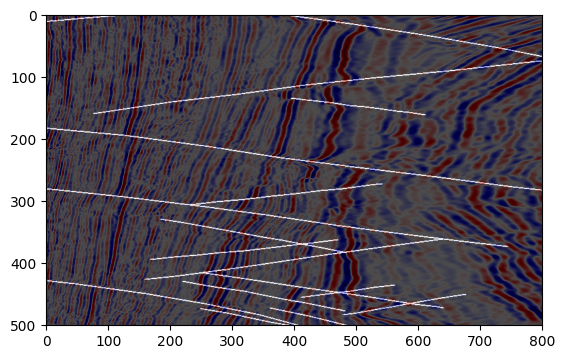

In [7]:
plt.imshow(image, cmap='seismic')
plt.imshow(label, cmap='gray', alpha=0.7)
plt.show()